In [1]:
import numpy as np
import scipy.ndimage as ndimage
from scipy import optimize
import matplotlib.pyplot as plt
import cv2

In [2]:
def mse(arr1, arr2):
    """
    Compute the mean squared error between two arrays.

    Args:
    arr1: First input array.
    arr2: Second input array.

    Returns:
    Mean squared error.
    """
    # Ensure the arrays are of the same shape
    x = min(arr1.shape[0], arr2.shape[0])
    y = min(arr1.shape[1], arr2.shape[1])

    arr1_cropped = arr1[:x, :y]
    arr2_cropped = arr2[:x, :y]

    # Compute the mean squared error
    mse_value = np.mean((arr1_cropped - arr2_cropped) ** 2)

    return mse_value


In [3]:
def apply_rotation(angle, img):
    """
    Rotate the image using OpenCV
    """
    rows, cols = img.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated_img = cv2.warpAffine(img, M, (cols, rows))
    return rotated_img


In [4]:
def cost_mse(angle, reference_image, target_image):
    transformed = apply_rotation(angle, target_image)
    cost = mse(reference_image, transformed)
    return cost


In [5]:
# Load images using OpenCV
static = cv2.imread('brain.png', cv2.IMREAD_GRAYSCALE)
moving = cv2.imread('distorted.png', cv2.IMREAD_GRAYSCALE)

# Ensure the images are loaded properly
if static is None or moving is None:
    raise ValueError("One or both images could not be loaded.")

In [6]:
# Define a range of angles to test
angles = np.linspace(0, 30, 301)
mse_values = [cost_mse(angle, static, moving) for angle in angles]

# Find the best angle
best_angle = angles[np.argmin(mse_values)]
print(f"Best angle: {best_angle:.2f}")


Best angle: 20.00


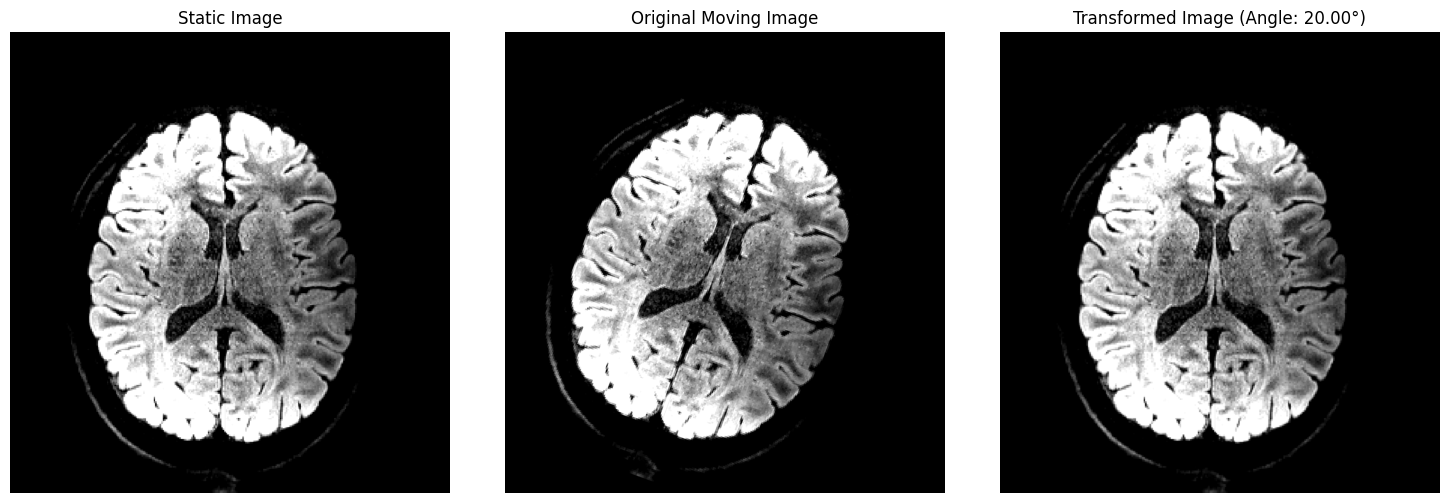

Initial MSE: 36.44
Final MSE: 7.19


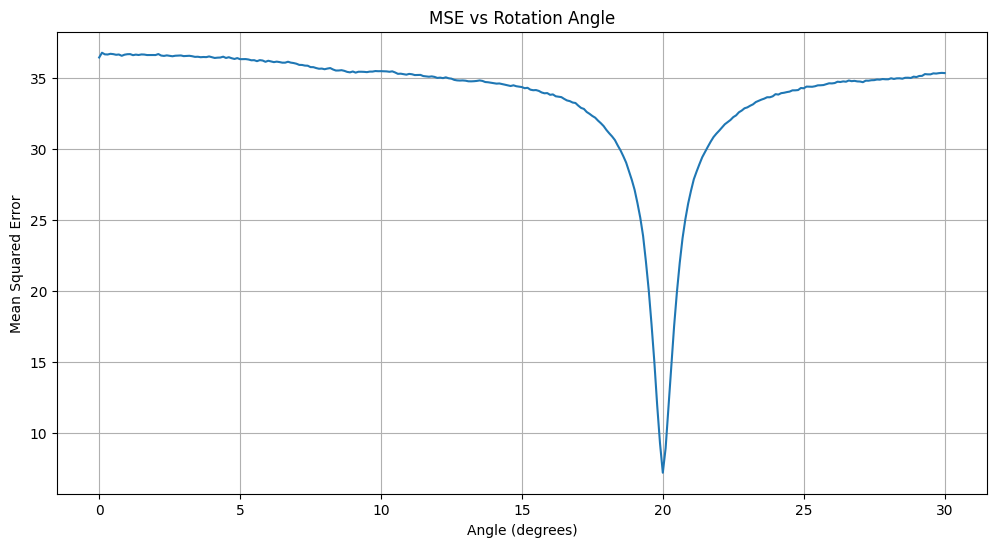

Angles with MSE close to minimum: [20.]


In [7]:
# Apply the best rotation angle to the moving image
transformed_image = apply_rotation(best_angle, moving)

# Function to plot images side by side
def plot_three_images(img1, img2, img3, title1, title2, title3):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img1, cmap='gray')
    plt.title(title1)
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(img2, cmap='gray')
    plt.title(title2)
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(img3, cmap='gray')
    plt.title(title3)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Detect edges
static_edges = cv2.Canny(static, 100, 200)
moving_edges = cv2.Canny(moving, 100, 200)
# transformed_edges = cv2.Canny(transformed_image, 100, 200)

# Plot the static, original moving, transformed images, and their edges
plot_three_images(static, moving, transformed_image,
                 'Static Image', 'Original Moving Image', 
                 f'Transformed Image (Angle: {best_angle:.2f}Â°)')

# Print MSE before and after transformation
initial_mse = mse(static, moving)
final_mse = mse(static, transformed_image)
print(f"Initial MSE: {initial_mse:.2f}")
print(f"Final MSE: {final_mse:.2f}")

# Plot MSE vs Angle
plt.figure(figsize=(12, 6))
plt.plot(angles, mse_values)
plt.title('MSE vs Rotation Angle')
plt.xlabel('Angle (degrees)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Find angles with MSE close to the minimum
threshold = 1.001  # Consider angles with MSE within 0.1% of the minimum
min_mse = min(mse_values)
close_angles = angles[mse_values <= min_mse * threshold]
print(f"Angles with MSE close to minimum: {close_angles}")